In [15]:
import numpy as np
import pandas as pd

In [16]:
listings_df = pd.read_csv('archive/AB_NYC_2019.csv')

In [17]:
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [18]:
# how many rulls are found in each column:
listings_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [19]:
column_to_drop = listings_df[['id', 'host_name','last_review']]
listings_df.drop(column_to_drop, axis="columns", inplace=True)

In [20]:
listings_df.fillna({'reviews_per_month': 0}, inplace =True)

In [21]:
listings_df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [22]:
# filter by columns (by name)
listings_df[['name','neighbourhood_group','price']]

,name,neighbourhood_group,price
0,Clean & quiet apt home by the park,Brooklyn,149
1,Skylit Midtown Castle,Manhattan,225
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,150
3,Cozy Entire Floor of Brownstone,Brooklyn,89
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,80
...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Brooklyn,70
48891,Affordable room in Bushwick/East Williamsburg,Brooklyn,40
48892,Sunny Studio at Historical Neighborhood,Manhattan,115
48893,43rd St. Time Square-cozy single bed,Manhattan,55


In [23]:
# filter by rows
listings_df[0:8]

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220


In [24]:
# select airbnbs having price lower than 100
listings_df[listings_df['price'] < 100]

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
6,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,QUIT PRIVATE HOUSE,107716952,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,0.00,2,163
48890,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48893,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


In [25]:
# shape of the data frame 
listings_df[listings_df['price'] < 10].shape

(11, 13)

# Exploratory data analysis

In [26]:
# What are the 10 most reviewd listings?
listings_df.nlargest(10,'number_of_reviews')

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [28]:
# What are the NY neigbourhood groups with listings?
listings_df['neighbourhood_group'].unique()


array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [29]:
# How many listings per neighbourhood groups?
listings_df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [30]:
# What are the top 10 neighbourhood with Airbnb listings?
listings_df['neighbourhood_group'].value_counts().head(10)

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

# Data visualization

<AxesSubplot:>

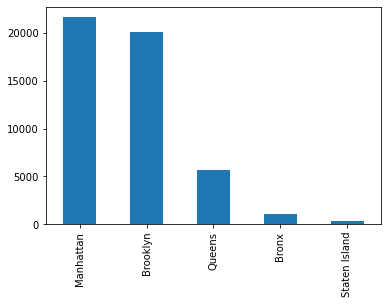

In [31]:
listings_df['neighbourhood_group'].value_counts().head(10).plot(kind='bar')

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

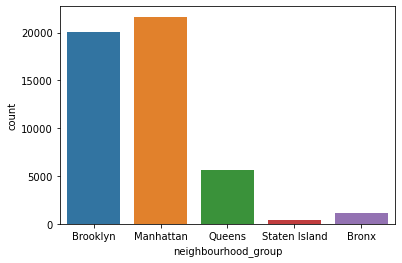

In [32]:
import seaborn as sns
sns.countplot(data=listings_df, x='neighbourhood_group')

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

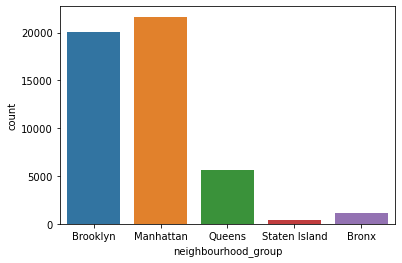

In [33]:
order = listings_df['neighbourhood_group'].value_counts().index
sns.countplot(data = listings_df, x='neighbourhood_group')

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

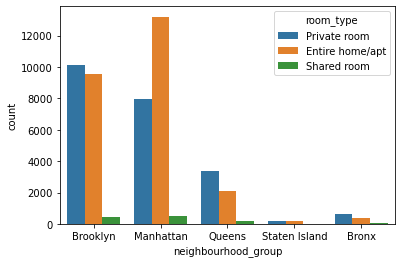

In [34]:
# What's the influence neighbourhood group on room type?
listings_df['room_type'].unique()
sns.countplot(data = listings_df, x='neighbourhood_group', hue='room_type')

/Users/zhoushimi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

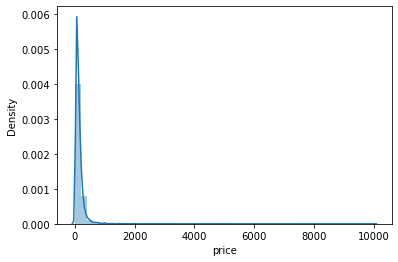

In [35]:
# What is the distribution of listing prices?
sns.distplot(listings_df['price'])


/Users/zhoushimi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

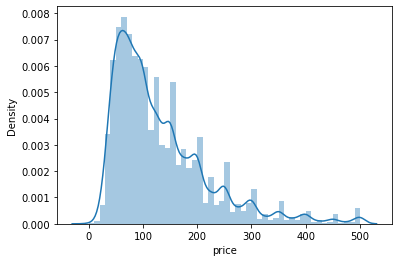

In [36]:
# How many listings 
affordable_df = listings_df[listings_df['price'] <= 500]
sns.distplot(affordable_df['price'])

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

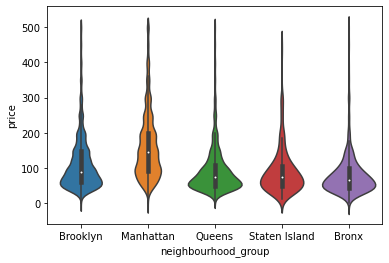

In [37]:
# What is the distribution of listing prices based on the Neighbourhood Group?
sns.violinplot(data = affordable_df, x='neighbourhood_group', y='price')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

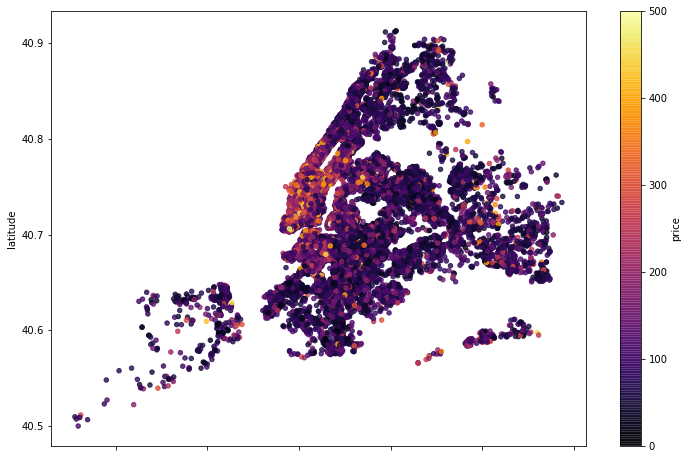

In [42]:
# Plot the listings on a map
affordable_df.plot(kind = 'scatter', x='longitude', y='latitude', c='price', cmap='inferno', colorbar=True, alpha = 0.8, figsize = (12,8))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

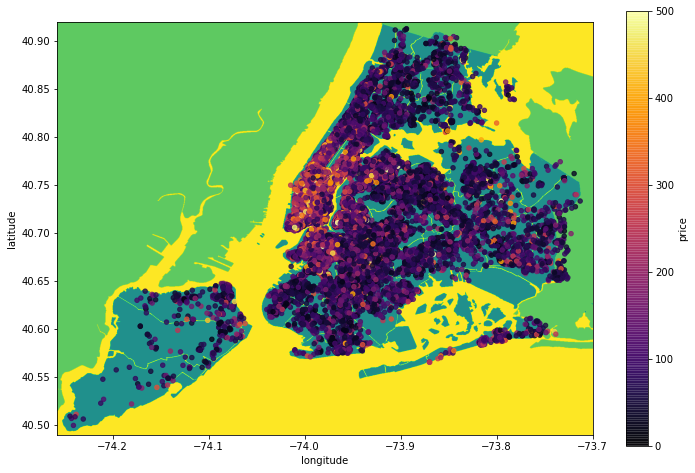

In [40]:
# Adding NYC map underneath
import matplotlib 
from matplotlib import pyplot as plt
background_img = plt.imread('http://raw.githubusercontent.com/lewagon/data-images/master/workshops/Neighbourhoods_New_York_City_Map.png')
plt.imshow(background_img, zorder = 0, extent = [-74.258, -73.7, 40.49, 40.92])
ax = plt.gca()
affordable_df.plot(
    ax = ax,
    zorder = 1,
    kind ='scatter',
    x = 'longitude',
    y = 'latitude',
    c ='price',
    cmap = 'inferno',
    colorbar = True,
    alpha = 0.8,
    figsize = (12,8)
)
